In [2]:
# Originally written by Greg Czerniak (email is greg {aT] czerniak [dOt} info )
#
# Implements a single-variable linear Kalman filter.
#
# Note: This code is part of a larger tutorial "Kalman Filters for Undergrads"
# located at http://greg.czerniak.info/node/5.
# Changes by Mark Moran for IS590IN for Fall, 2017 at the U of I iSchool:
# * Added additional comments
# * Turned additional constants into variables
# * Re-named variables for consistency and clarity
# * Moved variables to one spot to make it easier to configure and manage
import random
import numpy
import pylab


In [11]:
# ----------------------- For IS590IN Configure These------------------------
kal_init = 2.5 # Initial estimate of Kalman Filter
noise_level = 2.5
voltage_value = 15
num_steps = 60

In [12]:
# ----------------------------------------------------------------------------
# Implements a linear Kalman filter.
class KalmanFilterLinear:
    def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
        self.A = _A # State transition matrix.
        self.B = _B # Control matrix.
        self.H = _H # Observation matrix.
        self.current_state_estimate = _x # Initial state estimate.
        self.current_prob_estimate = _P # Initial covariance estimate.
        self.Q = _Q # Estimated error in process.
        self.R = _R # Estimated error in measurements.
    def GetCurrentState(self):
        return self.current_state_estimate

    def Step(self,control_vector,measurement_vector):
    #---------------------------Prediction step-----------------------------
        predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
        predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) +     self.Q
        #--------------------------Observation step-----------------------------
        innovation = measurement_vector - self.H*predicted_state_estimate
        innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
    #-----------------------------Update step-------------------------------
        kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
        self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation

    # We need the size of the matrix so we can make an identity matrix.
        size = self.current_prob_estimate.shape[0]

    # eye(n) = nxn identity matrix.
        self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate



In [13]:
class Voltmeter:
    def __init__(self,_truevoltage,_noiselevel):
        self.truevoltage = _truevoltage
        self.noiselevel = _noiselevel
    def GetVoltage(self):
        return self.truevoltage
    def GetVoltageWithNoise(self):
        return random.gauss(self.GetVoltage(),self.noiselevel)

In [14]:
A = numpy.matrix([1])
H = numpy.matrix([1])
B = numpy.matrix([0])
Q = numpy.matrix([0.00001])
R = numpy.matrix([0.1])
xhat = numpy.matrix([kal_init])

In [15]:
# ----------------------- For IS590IN Configure These------------------------
kal_init = 2.5 # Initial estimate of Kalman Filter
noise_level = .25
voltage_value = 1.25
num_steps = 120

In [16]:
P = numpy.matrix([2])

filter = KalmanFilterLinear(A,B,H,xhat,P,Q,R)
voltmeter = Voltmeter(voltage_value, noise_level)
measuredvoltage = []
truevoltage = []
kalman = []

In [17]:
for i in range(num_steps):
    measured = voltmeter.GetVoltageWithNoise()
    measuredvoltage.append(measured)
    truevoltage.append(voltmeter.GetVoltage())
    kalman.append(filter.GetCurrentState()[0,0])    
    filter.Step(numpy.matrix([0]),numpy.matrix([measured]))


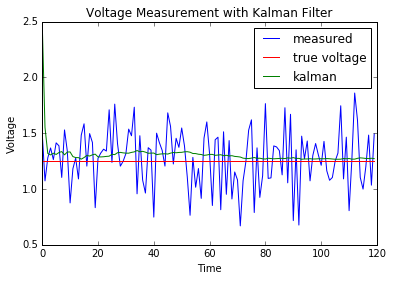

In [18]:
pylab.plot(range(num_steps),measuredvoltage,'b',range(num_steps),truevoltage,'r',range(num_steps)
,kalman,'g')
pylab.xlabel('Time')
pylab.ylabel('Voltage')
pylab.title('Voltage Measurement with Kalman Filter')
pylab.legend(('measured','true voltage','kalman'))
pylab.show()